<a href="https://colab.research.google.com/github/yy51/machine-learning/blob/master/adam_vs_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###TensorFlowのインポート

In [2]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 501kB 55.2MB/s 
     |████████████████████████████████| 4.3MB 54.2MB/s 


###データセットのダウンロードと準備

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [5]:
import numpy as np
n_labels = len(np.unique(train_labels))  # 分類クラスの数 = 5
train_labels_onehot = np.eye(n_labels)[train_labels]

In [6]:
n_labels = len(np.unique(test_labels))  # 分類クラスの数 = 5
test_labels_onehot = np.eye(n_labels)[test_labels]

### モデル作成

In [7]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [8]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [9]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [10]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

###モデルのコンパイルと学習

In [11]:
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sgd_scc = model1.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 208us/sample - loss: 0.5694 - accuracy: 0.8340 - val_loss: 0.1577 - val_accuracy: 0.9523
Epoch 2/30
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1334 - accuracy: 0.9587 - val_loss: 0.1054 - val_accuracy: 0.9666
Epoch 3/30
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.0720 - val_accuracy: 0.9765
Epoch 4/30
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0732 - accuracy: 0.9767 - val_loss: 0.0543 - val_accuracy: 0.9804
Epoch 5/30
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.0480 - val_accuracy: 0.9842
Epoch 6/30
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0439 - val_accuracy: 0.9852
Epoch 7/30
60000/60000 [=========================

In [12]:
model2.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

sgd_mse = model2.fit(train_images, train_labels_onehot, epochs=100, validation_data=(test_images, test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0897 - accuracy: 0.1091 - val_loss: 0.0895 - val_accuracy: 0.1436
Epoch 2/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0892 - accuracy: 0.1787 - val_loss: 0.0888 - val_accuracy: 0.2287
Epoch 3/100
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0884 - accuracy: 0.2797 - val_loss: 0.0877 - val_accuracy: 0.3578
Epoch 4/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0866 - accuracy: 0.3885 - val_loss: 0.0848 - val_accuracy: 0.4524
Epoch 5/100
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0796 - accuracy: 0.4830 - val_loss: 0.0690 - val_accuracy: 0.5531
Epoch 6/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0525 - accuracy: 0.6618 - val_loss: 0.0367 - val_accuracy: 0.7843
Epoch 7/100
60000/60000 [===================

In [13]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

adam_scc = model3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1432 - accuracy: 0.9551 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 2/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0402 - val_accuracy: 0.9872
Epoch 3/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0349 - val_accuracy: 0.9879
Epoch 4/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0276 - val_accuracy: 0.9910
Epoch 5/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0324 - val_accuracy: 0.9913
Epoch 6/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0329 - val_accuracy: 0.9901
Epoch 7/20
60000/60000 [==========================

In [14]:
model4.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

adam_mse = model4.fit(train_images, train_labels_onehot, epochs=20, validation_data=(test_images, test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0071 - accuracy: 0.9518 - val_loss: 0.0026 - val_accuracy: 0.9823
Epoch 2/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0025 - accuracy: 0.9836 - val_loss: 0.0018 - val_accuracy: 0.9884
Epoch 3/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0019 - accuracy: 0.9876 - val_loss: 0.0016 - val_accuracy: 0.9901
Epoch 4/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0016 - accuracy: 0.9894 - val_loss: 0.0016 - val_accuracy: 0.9903
Epoch 5/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0014 - accuracy: 0.9917 - val_loss: 0.0015 - val_accuracy: 0.9906
Epoch 6/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0012 - accuracy: 0.9925 - val_loss: 0.0018 - val_accuracy: 0.9888
Epoch 7/20
60000/60000 [==========================

###グラフ描画

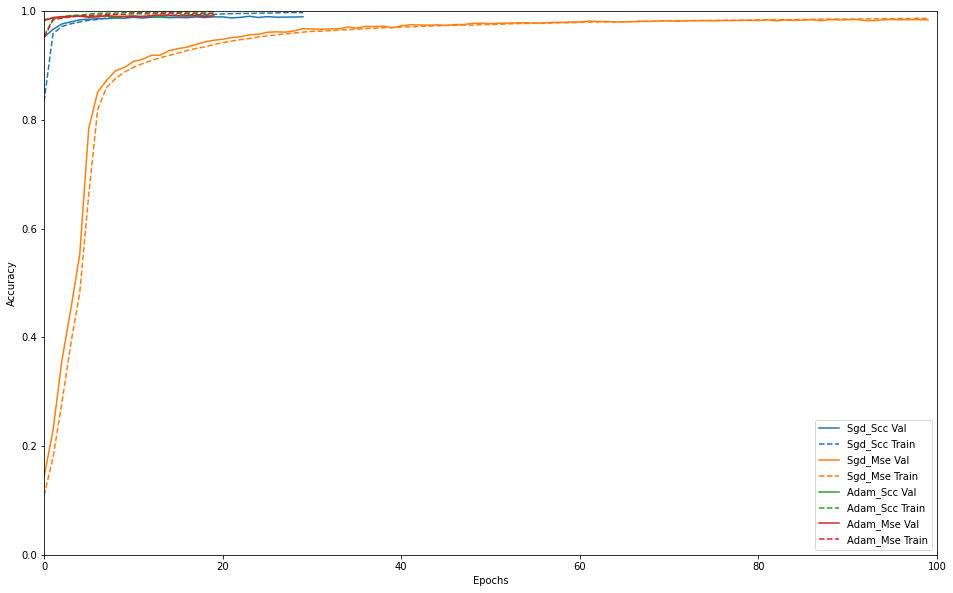

In [20]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                    label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,100])
  plt.ylim([0,1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])

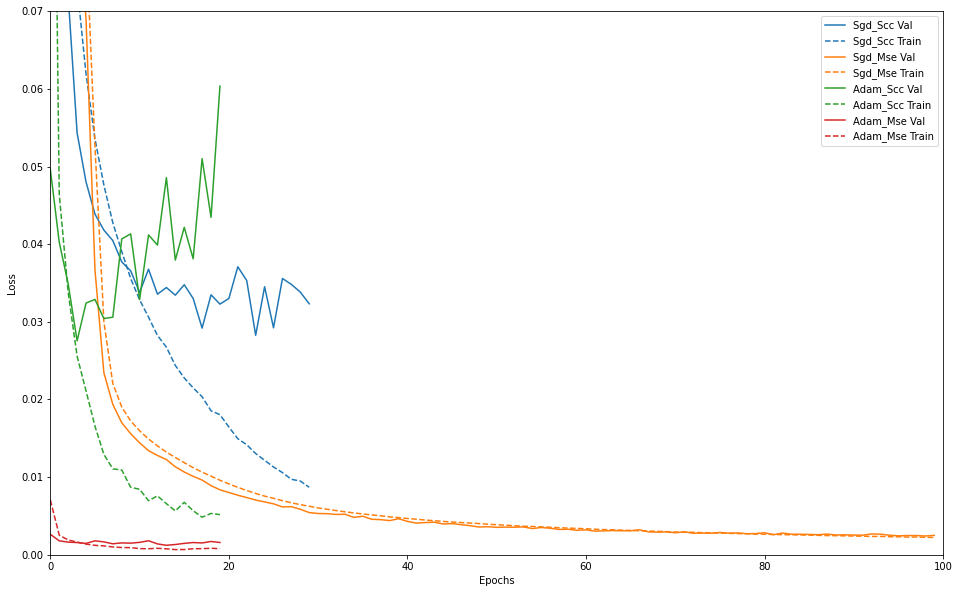

In [24]:
import matplotlib.pyplot as plt

def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,100])
  plt.ylim([0,0.07])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])